In [2]:
# Importing libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import IFrame
#from io import BytesIO
from numpy import random
from PIL import Image, ImageFile
from scipy import signal
from scipy import ndimage
from scipy.ndimage import filters
from skimage import data
import cv2
from tqdm.notebook import tqdm

In [3]:
# load datasets
path_annotrain = "../datasets/datasets_train/train_annotation/_annotation.csv"
path_footprint = "../datasets/car_models_footprint.csv"

train_annotation = pd.read_csv(path_annotrain, index_col=0)
footprints = pd.read_csv(path_footprint, index_col=0,delimiter=";")

In [4]:
# split data to car and non car
train_annotation['class'] = np.where(train_annotation['class'] == 'car', "car", "non car")

In [5]:
train_annotation = train_annotation[train_annotation['class'] == 'car']

In [6]:
DIR="../datasets/datasets_train/train/"
images_path= train_annotation["im_name"].values
images_labels = train_annotation["models"].values
images_train = []
images_train_labels = []
for i in range(len(images_path)):
    try:
        image = Image.open(DIR+images_path[i])
        image = image.resize((416, 416))
        image = np.asarray(image)
        if len(image.shape) == 2:
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        images_train.append(image)
        images_train_labels.append(images_labels[i])
    except:
        continue

In [17]:
len(images_train)

1309

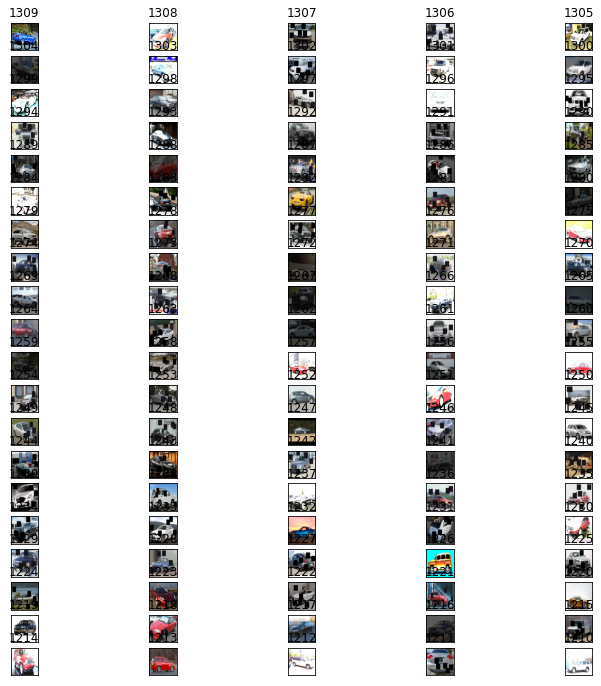

In [31]:
# plot dernier 100 voitures
rows = 20
_ = plt.figure(figsize=(12, 12))
cols = 100//rows if 100 % 2 == 0 else 100//rows + 1
for i in range(100):
    plt.subplot(rows, cols, i+1)
    plt.imshow(images_train[-i],cmap="gray")
    plt.title(str(1309-i))
    plt.xticks([])
    plt.yticks([])

In [2]:
def neigbor_denoising(ar, neig=5):
    """
    replace null pixels by averaging neighborhood not null pixels

    """
    data = ar.copy()
    mark_x = np.where(data == 0)[0]  # row index of null pixels
    mark_y = np.where(data == 0)[1]  # col index of null pixels
    for x, y in zip(mark_x, mark_y):
        # assuming you want neig x neig square
        slice = data[max(0, x-neig):x+neig, max(0, y-neig):y+neig]
        data[x, y] = np.mean([i for i in slice.flatten() if i > 0])
    return data

In [354]:
def remove_black_box(im):
    median = cv2.medianBlur(im,5)
    gray = cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)
    median = cv2.medianBlur(gray,5)
    a= 1*(gray <15)
    a=a.astype('uint8')
    kernel = np.ones((20,20),np.uint8)
    erode = cv2.erode(a,kernel,iterations = 1)
    kernel = np.ones((35,30),np.uint8)
    dilation = cv2.dilate(erode,kernel,iterations = 1)
    mask = dilation
    dst = cv2.inpaint(im,mask,20,cv2.INPAINT_TELEA)
    return dst

In [346]:
def remove_black_box(im):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    a= 1*(gray <10)
    a=a.astype('uint8')
    kernel = np.ones((12,12),np.uint8)
    dilation = cv2.dilate(a,kernel,iterations = 1)
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    mask = closing
    dst = cv2.inpaint(im,mask,20,cv2.INPAINT_TELEA)
    return dst

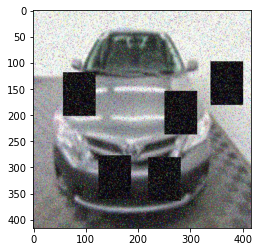

In [355]:
im = images_train[1261]
plt.imshow(remove_black_box(im))

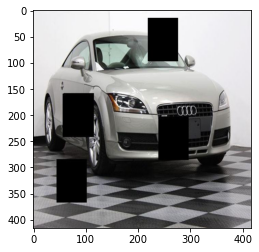

In [345]:
im = images_train[1225]
plt.imshow(im)

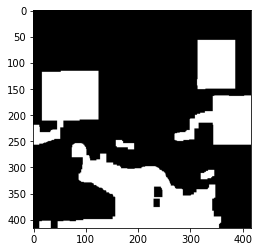

In [326]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
a= 1*(gray <10)
a=a.astype('uint8')
kernel = np.ones((12,12),np.uint8)
dilation = cv2.dilate(a,kernel,iterations = 1)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')

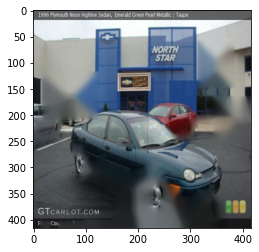

In [327]:
mask = closing
dst = cv2.inpaint(im,mask,20,cv2.INPAINT_TELEA)
plt.imshow(dst)

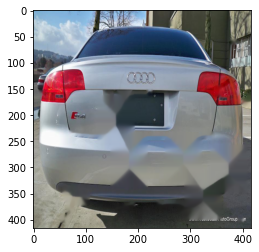

In [75]:
dst2 = cv2.inpaint(im,mask,20,cv2.INPAINT_NS)
plt.imshow(dst2)

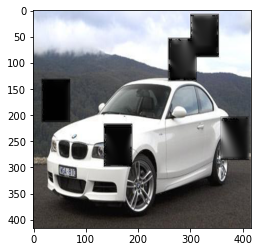

In [182]:
# fonction du tp1
denoise = neigbor_denoising(im, neig=5)
plt.imshow(denoise)

In [5]:
#essayer d'enlever les pixels noirs de l'image 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import IFrame
#from io import BytesIO
from numpy import random
from PIL import Image, ImageFile
from scipy import signal
from scipy import ndimage
from scipy.ndimage import filters
from skimage import data
from tqdm.notebook import tqdm
path_to_my_color_image="../datasets/datasets_train/train/523239424.jpg"
my_noised_color_image=np.array(path_to_my_color_image) # j'ai converti en array un objet PIL
my_denoised_image=np.zeros(np.array(my_noised_color_image).shape)

for i in tqdm(range(3)): 
    my_denoised.image[:, :, i]=neigbor_denoising(
        my_noised_color_image[:, :, i], neig=2)
    
my_denoised_image = np.uint8(my_denoised_image)

fig, axes = plt.subplots(nrowq=1, ncols=2, figsize=(16,12))

axes[0].imshow(my_noised_color_image)
axes[1].imshow(my_denoised_image)
    
    
    
    
    

  0%|          | 0/3 [00:00<?, ?it/s]

IndexError: too many indices for array: array is 0-dimensional, but 3 were indexed

  0%|          | 0/3 [00:00<?, ?it/s]

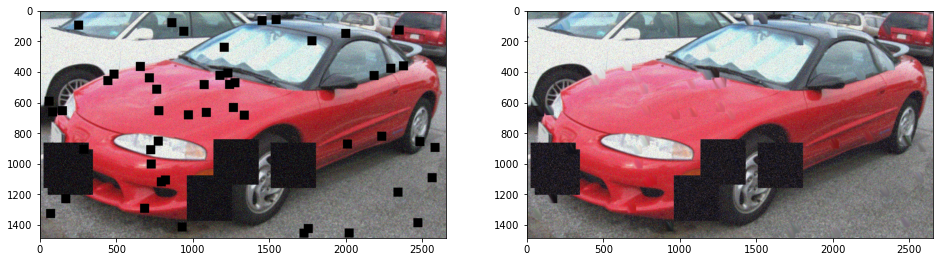

In [7]:
#après avoir rajouter des pixels noirs intentionnellement, je les enlève grâce à la méthode denoise et cela fonctionne 

# il faut maintenant le faire sur les pixels noirs de l'image 

path_to_my_color_image = "../datasets/datasets_train/train/523239424.jpg"

my_color_image = Image.open(path_to_my_color_image)  # the PIL image object
def add_noise(img):
    a = np.array(img)
    rows = a.shape[0]
    cols = a.shape[1]
    s = int(min(rows, cols)/25)  # size of spot is 1/25 of smallest dimension

    for i in range(50):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a[y:(y+s), x:(x+s)] = 0

    return a
my_noised_color_image = add_noise(my_color_image)
my_denoised_image = np.zeros(my_noised_color_image.shape)
for i in tqdm(range(3)):
    my_denoised_image[:, :, i] = neigbor_denoising(
        my_noised_color_image[:, :, i], neig=2)

my_denoised_image = np.uint8(my_denoised_image)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))

axes[0].imshow(my_noised_color_image)
axes[1].imshow(my_denoised_image);

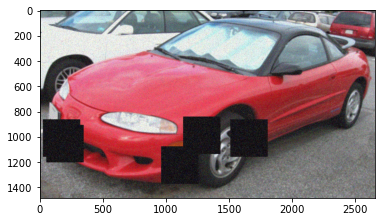

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import IFrame
#from io import BytesIO
from numpy import random
from PIL import Image, ImageFile
from scipy import signal
from scipy import ndimage
from scipy.ndimage import filters
from skimage import data
from tqdm.notebook import tqdm
path_to_my_color_image = "../datasets/datasets_train/train/523239424.jpg"
im=Image.open(path_to_my_color_image)
plt.imshow(im)

In [6]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import IFrame
#from io import BytesIO
from numpy import random
from PIL import Image, ImageFile
from scipy import signal
from scipy import ndimage
from scipy.ndimage import filters
from skimage import data
import cv2
from tqdm.notebook import tqdm


gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
a= 1*(gray ==0)
a=a.astype('uint8')
kernel = np.ones((12,12),np.uint8)
dilation = cv2.dilate(a,kernel,iterations = 1)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')


ModuleNotFoundError: No module named 'cv2'